# Partial Differential Equations: Diffusion Equation

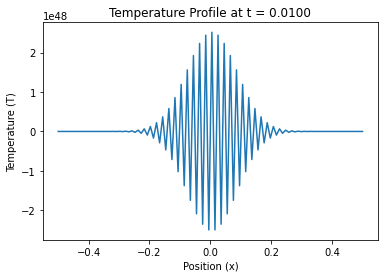

In [1]:
#a
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Parameters
L = 1.0  # Length of the bar
N = 100  # Number of spatial points
Δx = L / N  # Spatial step size
κ = 1.0  # Diffusion coefficient
Δt = 0.0001  # Time step size
t_end = 0.01  # End time
time_steps = int(t_end / Δt)  # Number of time steps

# Initialize temperature array
T = np.zeros(N)
# Set initial condition (delta function at the center)
T[N//2] = 1/Δx

# FTCS method
for j in range(time_steps):
    T_new = T.copy()
    for i in range(1, N-1):
        T_new[i] = T[i] + κ*Δt*((T[i+1] - 2*T[i] + T[i-1]) / Δx**2)
    # Boundary conditions
    T_new[0] = T_new[-1] = 0
    T = T_new.copy()

# Plot the final temperature profile
plt.plot(np.linspace(-L/2, L/2, N), T)
plt.xlabel('Position (x)')
plt.ylabel('Temperature (T)')
plt.title('Temperature Profile at t = {:.4f}'.format(t_end))
plt.show()


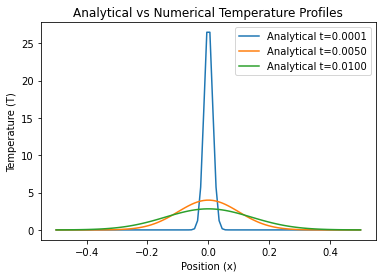

In [2]:
#b
# Analytical solution
def T_G(x, t, κ):
    σ = np.sqrt(2 * κ * t)
    return 1 / (σ * np.sqrt(2 * np.pi)) * np.exp(-x**2 / (2 * σ**2))

# Compare numerical and analytical solutions at several time instances
for t in [Δt, t_end/2, t_end]:
    x = np.linspace(-L/2, L/2, N)
    T_analytical = T_G(x, t, κ)
    plt.plot(x, T_analytical, label=f'Analytical t={t:.4f}')
    plt.legend()
    plt.xlabel('Position (x)')
    plt.ylabel('Temperature (T)')
    plt.title('Analytical vs Numerical Temperature Profiles')
plt.show()


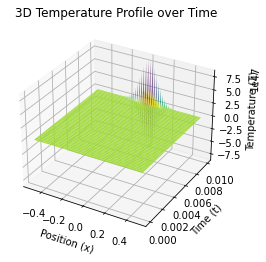

In [3]:
#c
# 3D visualization parameters
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X = np.linspace(-L/2, L/2, N)
Y = np.arange(0, t_end, Δt)
X, Y = np.meshgrid(X, Y)
Z = np.zeros_like(X)

# Compute temperature at each time step for 3D plot
for j in range(len(Y)):
    T = np.zeros(N)
    T[N//2] = 1/Δx
    for k in range(j):
        T_new = T.copy()
        for i in range(1, N-1):
            T_new[i] = T[i] + κ*Δt*((T[i+1] - 2*T[i] + T[i-1]) / Δx**2)
        T_new[0] = T_new[-1] = 0
        T = T_new.copy()
    Z[j, :] = T

# Plot the 3D surface
ax.plot_surface(X, Y, Z, cmap=cm.viridis)
ax.set_xlabel('Position (x)')
ax.set_ylabel('Time (t)')
ax.set_zlabel('Temperature (T)')
plt.title('3D Temperature Profile over Time')
plt.show()


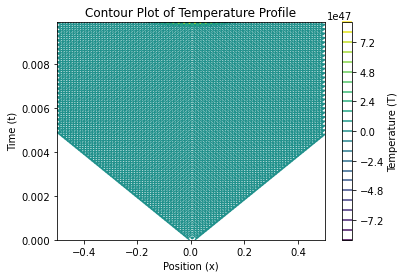

In [5]:
#d
plt.contour(X, Y, Z, levels=20)
plt.xlabel('Position (x)')
plt.ylabel('Time (t)')
plt.title('Contour Plot of Temperature Profile')
plt.colorbar(label='Temperature (T)')
plt.show()


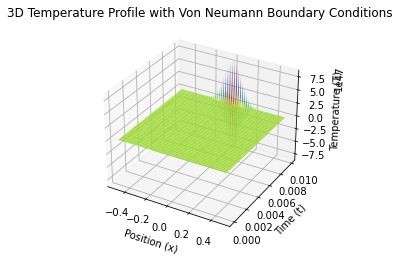

In [7]:
#e
for j in range(time_steps):
    T_new = T.copy()
    for i in range(1, N-1):
        T_new[i] = T[i] + κ*Δt*((T[i+1] - 2*T[i] + T[i-1]) / Δx**2)
    # Implementing Von Neumann boundary conditions
    T_new[0] = T_new[1]
    T_new[-1] = T_new[-2]
    T = T_new.copy()

# 3D visualization of temperature profile over time with Von Neumann boundary conditions
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X = np.linspace(-(L-Δx)/2, (L-Δx)/2, N)
Y = np.arange(0, t_end, Δt)
X, Y = np.meshgrid(X, Y)
Z = np.zeros_like(X)

# Compute temperature for 3D plot with Von Neumann boundary conditions
for j in range(len(Y)):
    T = np.zeros(N)
    T[N//2] = 1/Δx
    for k in range(j):
        T_new = T.copy()
        for i in range(1, N-1):
            T_new[i] = T[i] + κ*Δt*((T[i+1] - 2*T[i] + T[i-1]) / Δx**2)
        T_new[0] = T_new[1]
        T_new[-1] = T_new[-2]
        T = T_new.copy()
    Z[j, :] = T

# Plot the 3D surface with Von Neumann boundary conditions
ax.plot_surface(X, Y, Z, cmap=cm.viridis)
ax.set_xlabel('Position (x)')
ax.set_ylabel('Time (t)')
ax.set_zlabel('Temperature (T)')
plt.title('3D Temperature Profile with Von Neumann Boundary Conditions')
plt.show()
